# Ayudantia 2: Inteligencia Artificial


# Disclaimer
Esta ayudantía es 100% codigo porque está enfocada en la tarea. Si tienen consultas más teóricas de cómo se formulan las redes neuronales y el proceso de entrenamiento, pueden escribirme y les comparto material más avanzado.

Playlist de Redes Neuronales 3Blue1Brown
https://www.youtube.com/watch?v=aircAruvnKk&t=396s





# 1. Perceptron

<img src="https://editor.analyticsvidhya.com/uploads/38384perceptron%20diagram%20image.jpg" width="500"/>








El perceptron en su forma más minima, consiste en un modelo de regresión

**MUY IMPORTANTE: Si miramos bien, dependiendo de la funcion de activacion que yo tenga puedo tener una regresión lineal o logística**

# Multilayer Perceptron (MLP)

<img src="https://miro.medium.com/v2/resize:fit:1400/1*Di4V69e4gC16ooF6PZPt-A.png" width="500"/>

MLP es la base de las redes neuronales modernas, donde como podrán notar consiste en la aplicación sucesiva de "Regresiones" a los datos de entrada.

Los MLP surgieron de un esfuerzo por mejorar los perceptrones de una sola capa para los problemas de clasificación que no pueden tratar con datos que no son linealmente separables.



<img src="https://media.licdn.com/dms/image/D5612AQFjg55DNvuOAg/article-cover_image-shrink_600_2000/0/1706451794595?e=2147483647&v=beta&t=cqIhXDBYRCfFs2wmMCPEDF5dg7LDP9gqCa-gdBNMF3s" width="300"/>

Problema XOR

<img src="https://i.sstatic.net/qaBRT.png
" width="300"/>





# Implementación

Para el curso vamos a utilizar Sklearn, pero si necesitan aplicarlos para resolver problemas reales les recomiendo aprender frameworks como Pytorch o Keras.

## Implementación de MLP en Sklearn

Para implementar MLP en SKlearn debemos tener en consideración el tipo de problema a resolver. Si es de regresión o clasificación.

1. Regresión (Predecir un valor continuo): MLP Regressor https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html


2. Clasificación (Predecir valores discretos): MLP Classifier https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


Dado que la tarea es de clasificación revisaremos MLP Clasifier


## MPL Classifier

Para el algoritmo se utiliza la clase sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',  learning_rate_init=0.001, max_iter=200, random_state=None, tol=0.0001, verbose=True)<br><br>

Parámetros:

1. hidden_layers_sizes: Número de capas y cantidad de neuronas por capa
2. activation: Función de activación en la capa oculta
3. solver: Algoritmo de optimización para minimizar loss function (caja negra por ahora)
4. learning_rate_init: Step size por el cual me acerco al minimo de la loss function en cada iteración
5. random_state: definir una semilla para replicabilidad
6. tol: Criterio de parada del algoritmo
7. early_stopping: terminar el algoritmo si el valor de la loss function no mejora según valor tol


Hay varios más pero para dejar simple y comprensible la implementación utilizaremos esos.


## Ejemplo con dataset Iris
Tarea: implementar un modelo para clasificar tipos de flor segun datos

In [54]:
import pandas as pd
import numpy as np

iris = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


No olvidar realizar un EDA. Aplicamos lo aprendido antes en fundamentos de ciencias de datos

In [55]:
iris.describe() # Analisis de variables numericas

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [59]:
iris['species'].value_counts() # Analisis de variables categoricas

,count
species,
0,50
1,50
2,50


preparamos datos para el modelo

In [58]:
# transformamos la variable categorica a numerica, aplicando encodings
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species']) # asigno un unico valor a cada etiqueta
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [60]:
# estandarizamos variables numericas de iris

from sklearn.preprocessing import StandardScaler
iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = StandardScaler().fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
)

iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


Separamos data train vs test

In [61]:
from sklearn.model_selection import train_test_split

# Separamos data
X_train, X_test, y_train, y_test = train_test_split(iris[["sepal_length","sepal_width","petal_length","petal_width"]], iris["species"], test_size=0.35, random_state=42)

# imprimimos shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (97, 4)
X_test shape: (53, 4)
y_train shape: (97,)
y_test shape: (53,)


Ajustamos MLP clasiffier

In [79]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1,5,5),activation="relu",solver="adam",learning_rate_init=0.01, random_state=42,verbose=True,max_iter=10)

mlp.fit(X_train, y_train)

Iteration 1, loss = 1.11176741
Iteration 2, loss = 1.10861145
Iteration 3, loss = 1.10611142
Iteration 4, loss = 1.10405427
Iteration 5, loss = 1.10232153
Iteration 6, loss = 1.10090167
Iteration 7, loss = 1.09997943
Iteration 8, loss = 1.09921285
Iteration 9, loss = 1.09856566
Iteration 10, loss = 1.09790837


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(1, 5, 5), learning_rate_init=0.01,
              max_iter=10, random_state=42, verbose=True)

In [80]:
# Evaluamos perfomance en datos de entrenamiento

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, mlp.predict(X_train))
print(f"Accuracy train: {accuracy}")

Accuracy train: 0.31958762886597936


In [81]:
# Evaluamos perfomance en datos de test
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy test: {accuracy}")

Accuracy test: 0.3584905660377358


In [82]:
# Generamos un clasification report para tener todas las metricas segmentadas por clase
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      1.00      0.53        19
           1       0.00      0.00      0.00        17
           2       0.00      0.00      0.00        17

    accuracy                           0.36        53
   macro avg       0.12      0.33      0.18        53
weighted avg       0.13      0.36      0.19        53



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
# Obtenemos matriz de confusion
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[19,  0,  0],
       [17,  0,  0],
       [17,  0,  0]])

Text(50.722222222222214, 0.5, 'True')

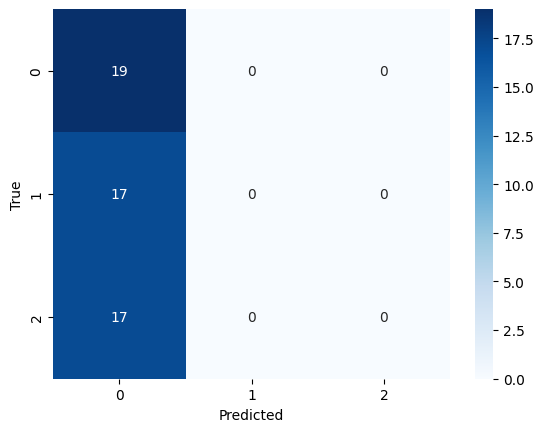

In [84]:
# plot confusion matrix using matplot add labels
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

## Cosas importantes:

1. Probar distintas arquitecturas, pueden utilizar grid search para evaluar distintos parametros automaticamente y quedarse con los mejores resultados.

  1.1 Probar manualmente tambien es valido, pero SIEMPRE justificar la eleccion comparando resultados de metricas. Un recordatorio para repasar las [metricas](https://sitiobigdata.com/2019/01/19/machine-learning-metrica-clasificacion-parte-3/)

2. Entender que tenemos muy pocos datos... en general existe la regla de que tenemos tantos numeros de capas y parametros tantos datos tenemos...

3. No olvidar preprocesar

4. Las redes neuronales no son la solucion a todo


In [ ]:
# To do para ustedes:

#https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b

